In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [3]:
sales.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## Data Wrangling

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### There are no null values in the dataset

In [8]:
for col in sales.describe(include = "object").columns:
    print(f"{col} \n",sales[col].unique())
    print("-"*45)
    print("-"*45)

Date 
 ['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-202

In [9]:
#Converting date column to date-time
sales["Date"] = pd.to_datetime(sales["Date"])
#sales["year"] = sales["Date"].dt.year
#sales["month"] = sales["Date"].dt.month
#sales["day"] = sales["Date"].dt.day
#sales["week"] = sales["Date"].dt.isocalendar().week
#sales.head()

In [10]:
sales.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [11]:
sales.duplicated().sum()

0

In [12]:
#Normalization of data
sales_nw = sales.copy()

In [13]:
#sales_nw["Unit"] = (sales_nw["Unit"] - sales_nw["Unit"].min())/(sales_nw["Unit"].max()-sales_nw["Unit"].min())

In [14]:
#sales_nw["Sales"] = (sales_nw["Sales"] - sales_nw["Sales"].min())/(sales_nw["Sales"].max()-sales_nw["Sales"].min())

In [15]:
normalize = MinMaxScaler()

In [16]:
sales_nw["Unit"] = normalize.fit_transform(sales_nw[["Unit"]]) 

In [17]:
sales_nw["Sales"] = normalize.fit_transform(sales_nw[["Sales"]]) 

#### We use the groupby function to filter data pertaining to a unique/distinct category of a categorical variable.

#### As there are no duplicates, null values and we have normalized the data, our data wrangling is completed and now we can perform Data Analysis.

# Data Analysis

In [20]:
# Descriptive statistical analysis
sales_nw[["Unit","Sales"]].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [96]:
# Highest and Lowest sales with respect to Group 
highest_group_sales = sales_nw.groupby(by = "Group")["Sales"].sum().idxmax()
lowest_group_sales = sales_nw.groupby(by = "Group")["Sales"].sum().idxmin()
print(f"Highest Group for sales are {highest_group_sales}\nLowest Group for sales are {lowest_group_sales}")

Highest Group for sales are  Men
Lowest Group for sales are  Seniors


#### The group with the highest sales is the Men Group 
#### The group with the lowest sales is the Seniors Group

In [23]:
# Generating Monthly,Weekly and Quarterly Data
monthly = sales_nw.resample('M',on = "Date")["Sales"].sum().reset_index()
weekly = sales_nw.resample("W",on = "Date")["Sales"].sum().reset_index()
quarterly = sales_nw.resample("Q",on = "Date")["Sales"].sum().reset_index()

In [24]:
monthly.iloc[monthly["Sales"].idxmax()]

Date     2020-12-31 00:00:00
Sales             779.238095
Name: 2, dtype: object

In [25]:
weekly.iloc[weekly["Sales"].idxmax()]

Date     2020-12-27 00:00:00
Sales             183.047619
Name: 12, dtype: object

In [26]:
quarterly.iloc[quarterly["Sales"].idxmax()]

Date     2020-12-31 00:00:00
Sales            1920.650794
Name: 0, dtype: object

#### The highest number of of sales are in the month of December 
#### The highest number of weekly sales are in the last week of December

## Data Visualization

In [29]:
sales_nw.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

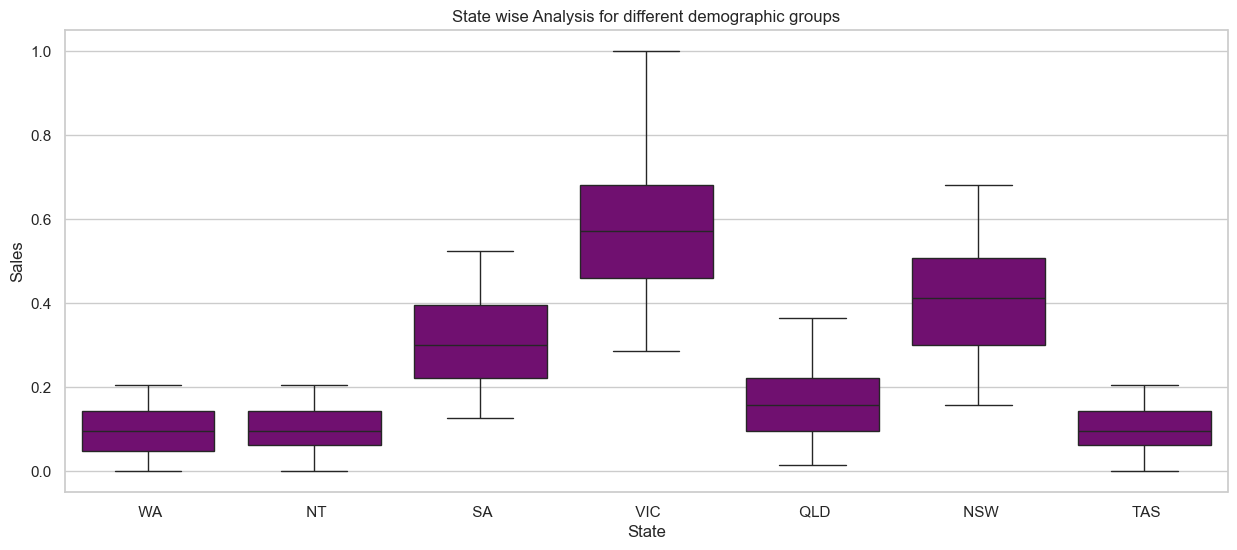

In [30]:
# Descriptive statistics with boxplot
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
#sns.set_palette("BuPu_r")
sns.boxplot(x = "State",y = "Sales",data = sales_nw,color = 'purple')
plt.title("State wise Analysis for different demographic groups")
plt.show()

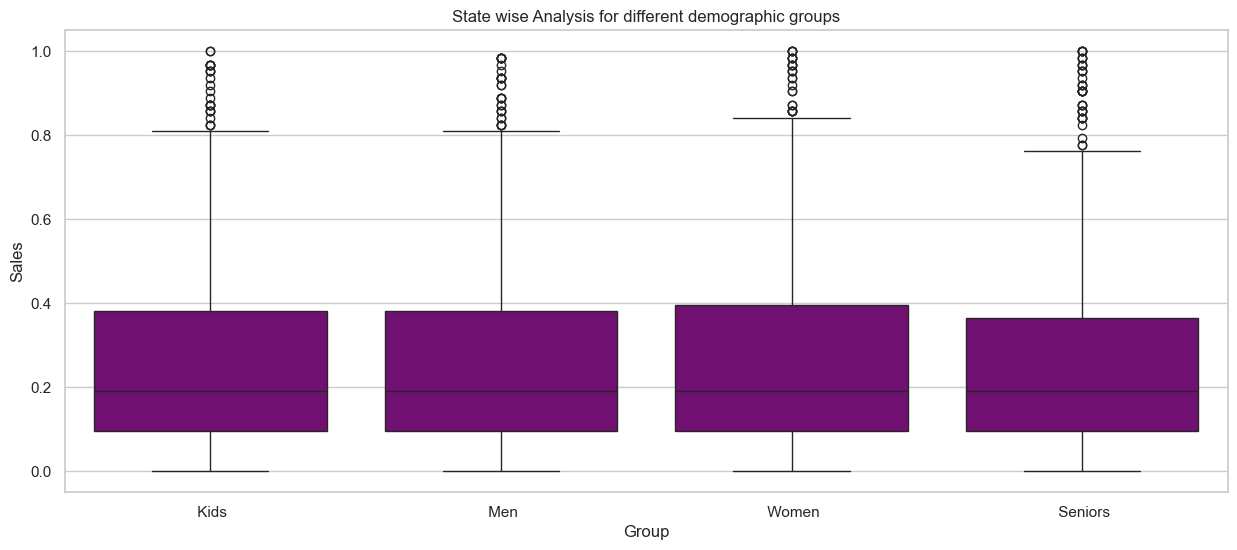

In [31]:
# Descriptive statistics with boxplot 
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
#sns.set_palette("BuPu_r")
sns.boxplot(x = "Group",y = "Sales",data = sales_nw,color = 'purple')
plt.title("State wise Analysis for different demographic groups")
plt.show()

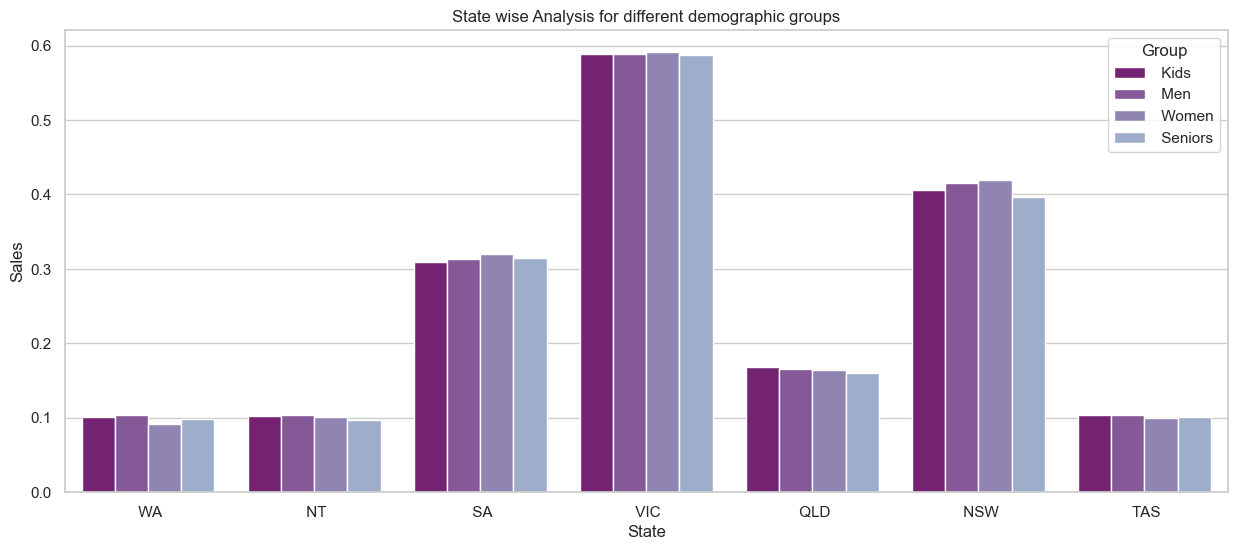

In [32]:
# State wise Analysis for different demographic groups
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
sns.set_palette("BuPu_r")
sns.barplot(x = "State",y = "Sales",data = sales_nw,hue = "Group",errorbar = None)
plt.title("State wise Analysis for different demographic groups")
plt.show()

#### Highest sales are recorded for the State of VIC with Women being the leading buyers and the Lowest sales are in the state of WA. 

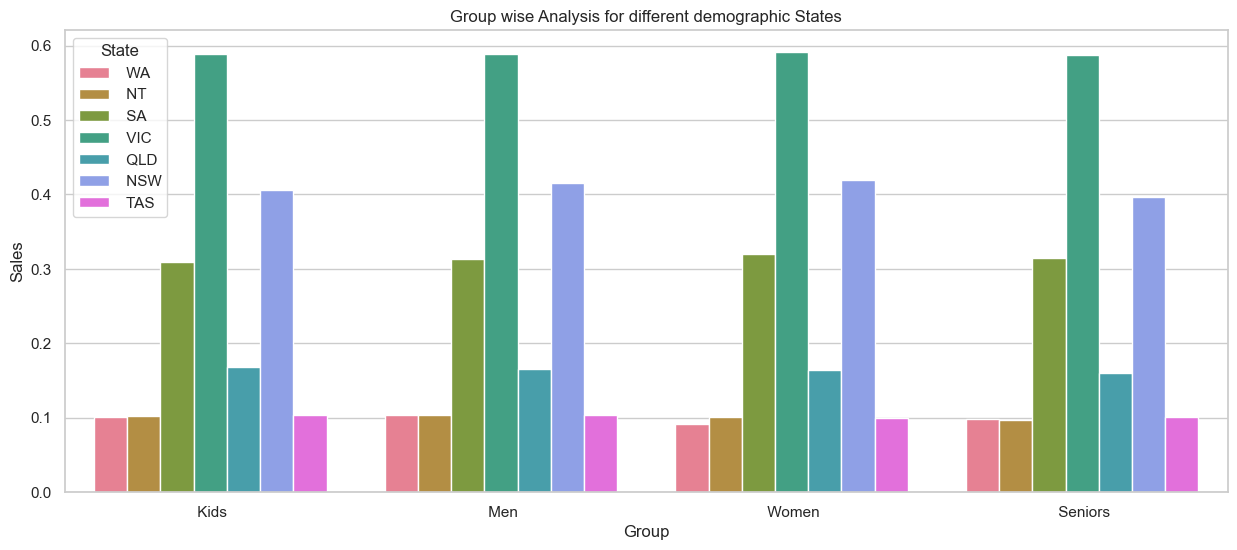

In [33]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
sns.set_palette("Dark2_r")
sns.barplot(x = "Group",y = "Sales",data = sales_nw,hue = "State",errorbar = None)
plt.title("Group wise Analysis for different demographic States")
plt.show()

#### The trend of all groups is the same for each state with seniors having relatively lowest sales.

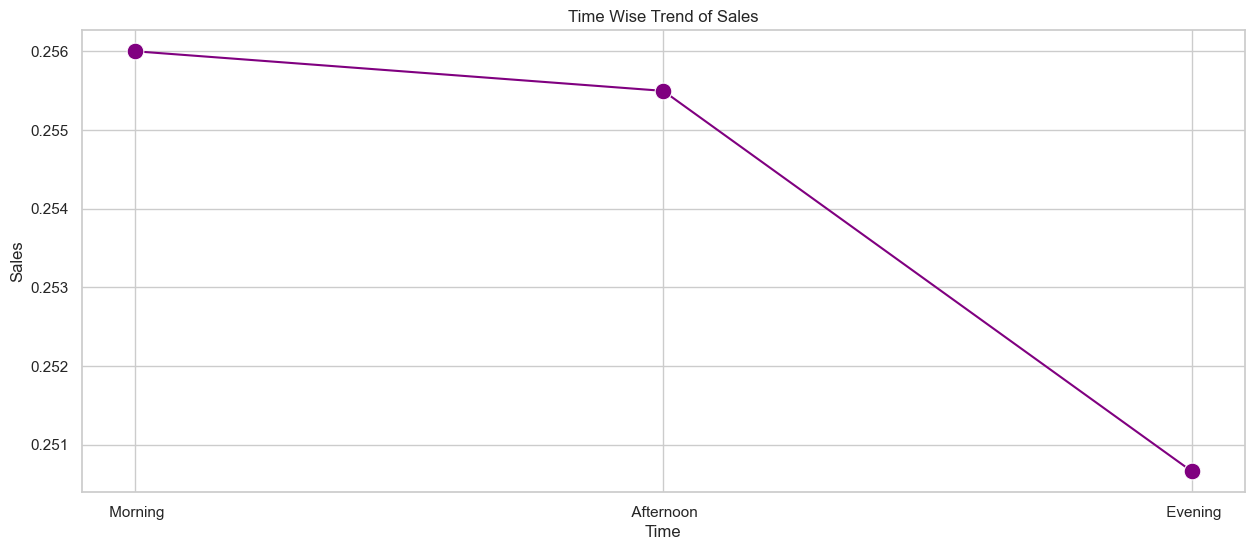

In [133]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
#sns.set_palette("Accent")
sns.lineplot(x = "Time",y = "Sales",data = sales_nw,errorbar = None,color = 'purple',marker = "o",markersize =12)
plt.title("Time Wise Trend of Sales")
plt.show()

#### The time for the highest sales is in the morning and then they decrease in the Afternoon but in the evening the sales are the lowest.

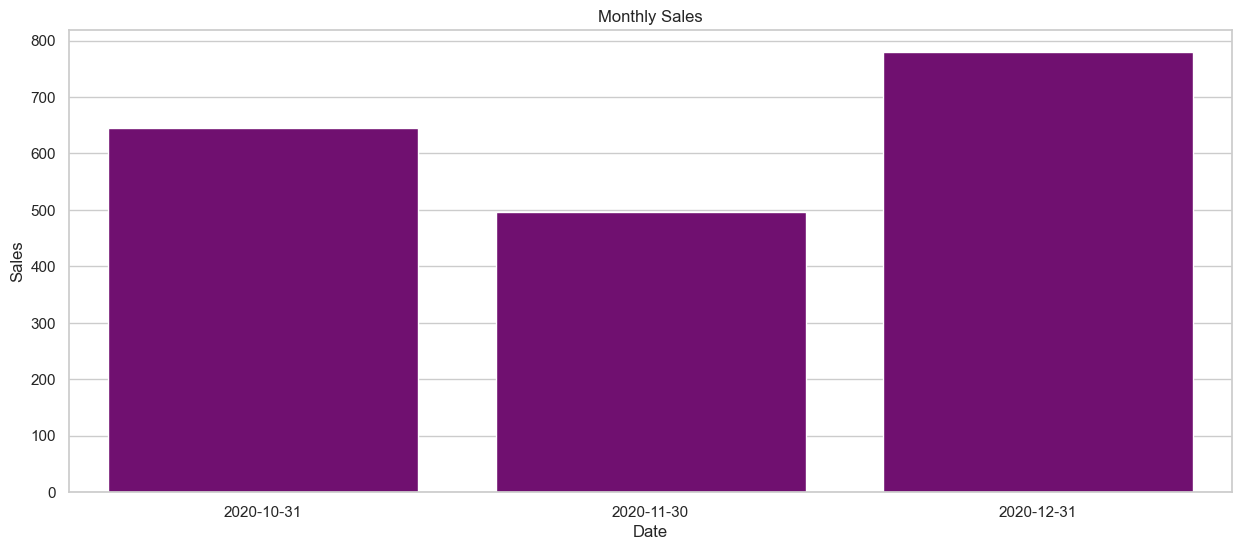

In [90]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
#sns.set_palette("Accent")
sns.barplot(x = "Date",y = "Sales",data = monthly,errorbar = None,color = 'purple')
plt.title("Monthly Sales")
plt.show()

#### The highest sales are recorded in the month of December and lowest sales in the month of November.

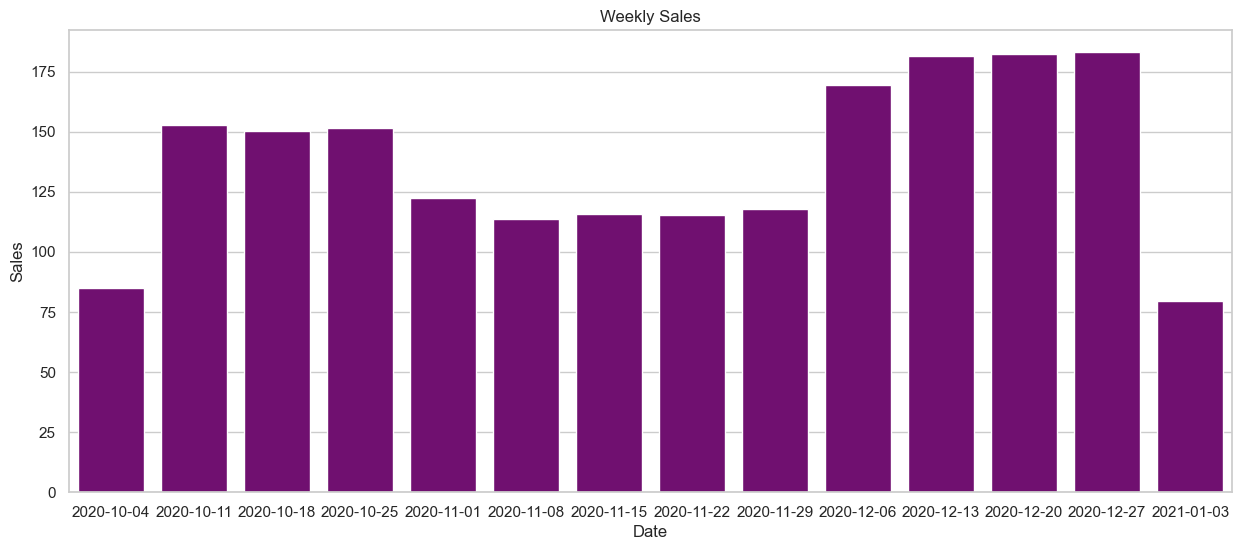

In [37]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
sns.barplot(x = "Date",y = "Sales",data = weekly,errorbar = None,color = 'purple')
plt.title("Weekly Sales")
plt.show()

#### We can see a rise in sales in the weeks of October and then a decrease in the weeks of November. At last, in the weeks of December we see the highest sales particularly in the last week of December.

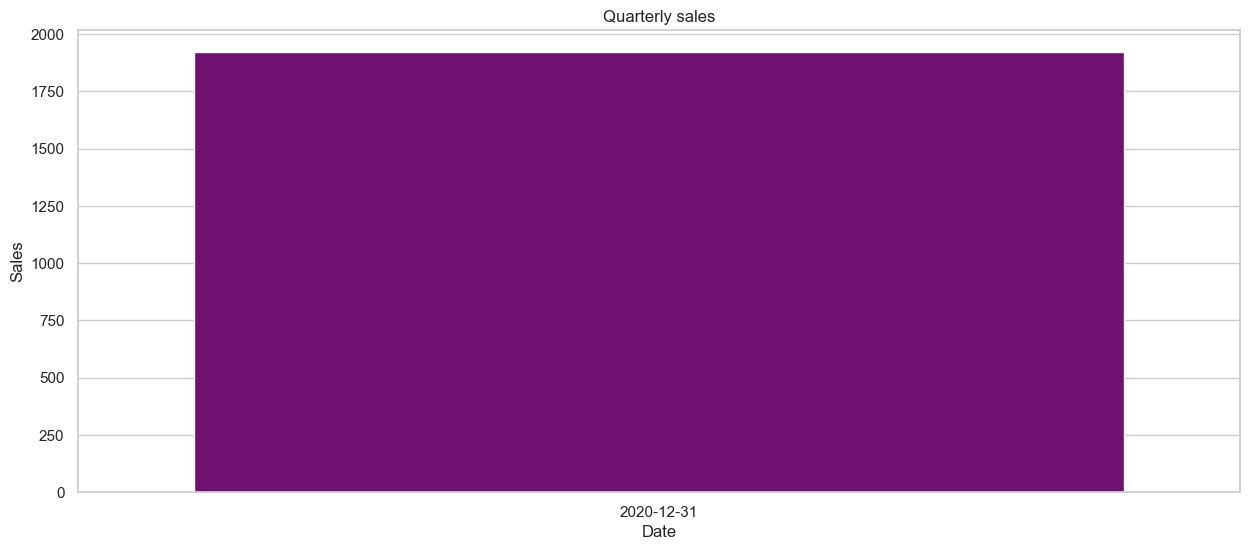

In [38]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.set_style('whitegrid')
sns.barplot(x = "Date",y = "Sales",data = quarterly,errorbar = None,color = 'purple')
plt.title("Quarterly sales")
plt.show()

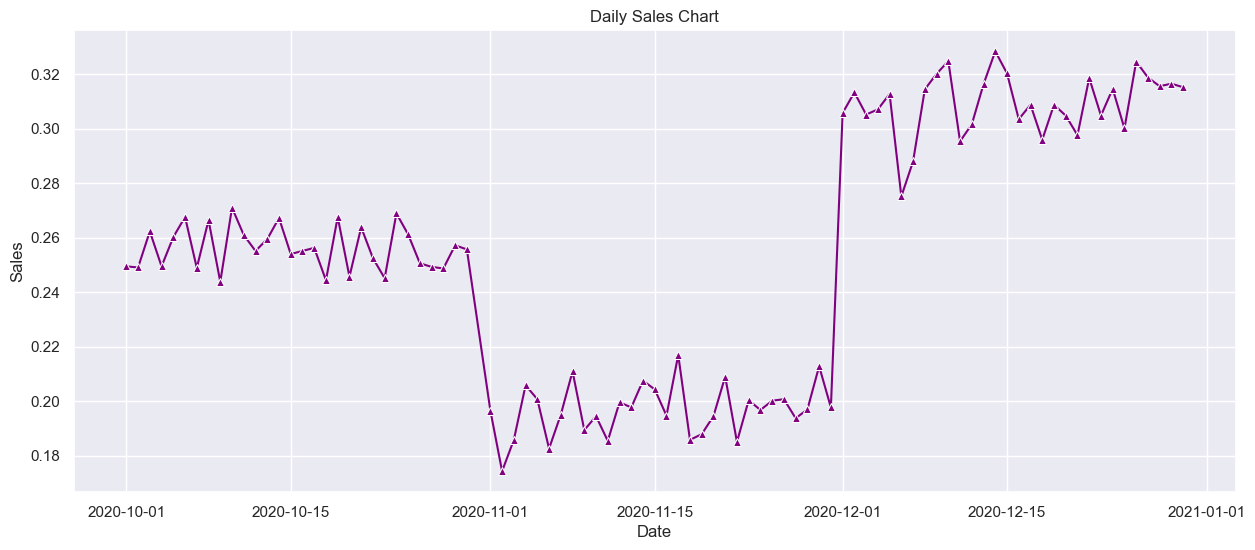

In [87]:
sns.set(rc= {"figure.figsize":(15,6)})
sns.lineplot(x = "Date", y = "Sales",data = sales_nw,color = 'purple',errorbar = None,marker = '^',markersize = 6)
plt.title("Daily Sales Chart")
plt.show()

#### This graph shows that the sales are almost constant in October and then they decrease in November with the lowest sales on the 2nd of November. By December the sales again increase but are not constant and we see the highest sales on 14th December.

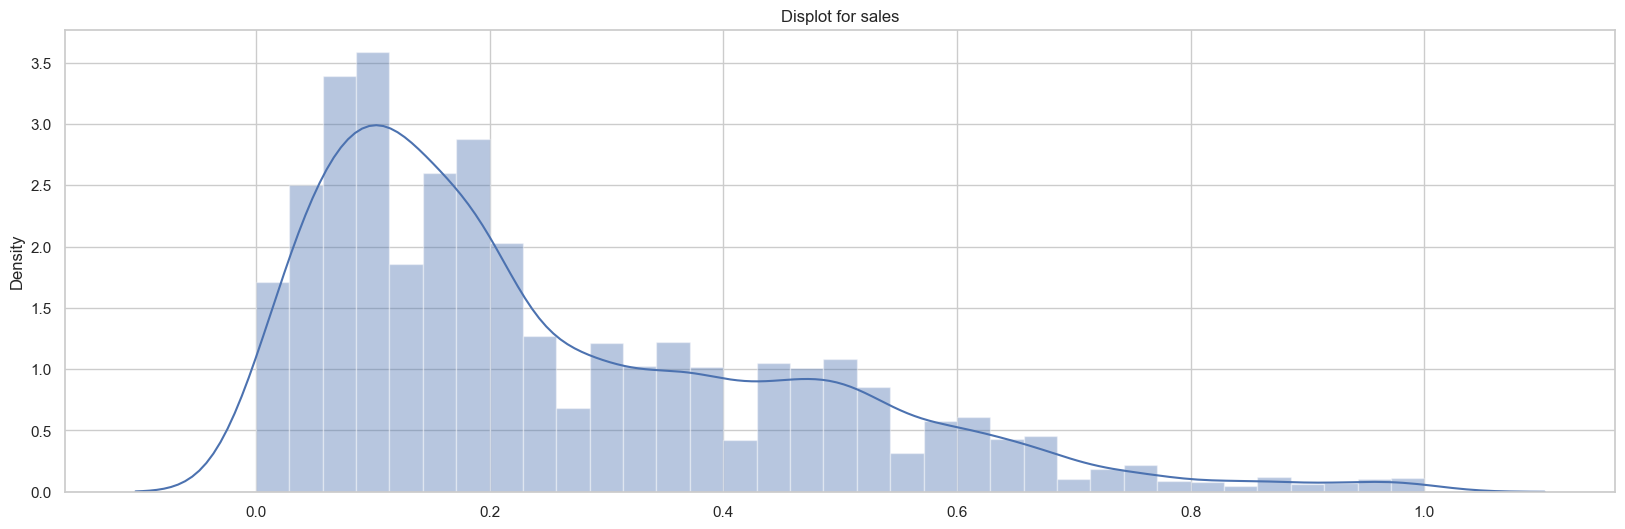

In [112]:
plt.figure(figsize = (20,6))
sns.distplot(x =sales_nw["Sales"])
plt.title("Displot for sales")
plt.show()

#### The distribution shows us that most of the sales tend to fall between 0 and 0.4, and the highest sales are around 0.2 mark which shows we have dense amount of low sales and less amound of high sales.

### I have used seaborn as the visualization library because it works better with statistical analysis, it is easy to customize graphs in it and provides with different options to make visualization more understandable and beautiful.

#### To boost sales we should offer November discounts and evening promotions to address low sales periods. Capitalizing on December’s high demand with bundled offers and maximizing morning sales through early-bird deals can further drive growth. Target men with tailored promotions, while offering senior discounts to attract older customers. Focus on strengthening sales in states with high sales such as VIC with localized campaigns and increasing sates with lower sales such as WA sales with aggressive promotions. Utilizing BOGO offers and holiday bundles will help attract new customers and boost overall revenue.